# Assignment 2 (Autumn 2020)

Module: **COMP30760 Data Science in Python**  
Name: **Rajit Banerjee**  
Student Number: **18202817**  
Countries: **Ireland, New Zealand, United States**   
Data: `../data/a2`  
Environment: `../environment.yml`

<img src='../images/title.jpg' align='left' width=500>
<img src='../images/flags.jpg' align='left' width=500>

## Task 1: Within-country analysis.

_Each dataset is a comma-separated values (CSV) file, which indicates the daily change (increase/decrease) in movement at a country level for six different location category types: retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, residential. This change is a percentage change relative to a baseline period from January 2020 (i.e. before these countries were affected by COVID-19)._

For this task, we will focus on analysing each of our three countries: Ireland, New Zealand and United States, individually.  
For each country, we will do the following:
- Time series construction
- Characterisation and visualisation
- Comparison of different location categories
- Outline possible reasons for observed differences
---

<h3 style='color: #2ca02c'>(I) Ireland</h3>

The first country on the list in Ireland, where we've managed to do quite well to endure the pandemic so far!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Let's see what a sample CSV file looks like
ireland = pd.read_csv('../data/a2/ireland.csv', index_col='date', parse_dates=True)
ireland.head()

id  country  \
date                           
2020-03-01  1265158  Ireland   
2020-03-02  1265159  Ireland   
2020-03-03  1265160  Ireland   
2020-03-04  1265161  Ireland   
2020-03-05  1265162  Ireland   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                3.0    
2020-03-02                                                4.0    
2020-03-03                                                8.0    
2020-03-04                                                5.0    
2020-03-05                                                4.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                3.0   
2020-03-02                                                4.0   
2020-03-03                                                5.0   
2020-03-04                                                4.0   
2020-03-05                                                4.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -5.0   
2020-03-02                                12.0   
2020-03-03                                29.0   
2020-03-04                                25.0   
2020-03-05                                15.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            2.0   
2020-03-02                                            1.0   
2020-03-03                                            2.0   
2020-03-04                                            1.0   
2020-03-05                                            0.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      2.0   
2020-03-02                                      1.0   
2020-03-03                                      3.0   
2020-03-04                                      1.0   
2020-03-05                                      2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       0.0  
2020-03-02                                       0.0  
2020-03-03                                      -1.0  
2020-03-04                                       0.0  
2020-03-05                                       0.0

Since this is time-series data, we can remove the `id` column (the DataFrame is indexed by `date` instead). Moreover, as all the given percentage changes in mobility are relative to the same baseline (January 2020), we can shorten the column names to improve readability.

In [2]:
def reformat(df: pd.DataFrame) -> pd.DataFrame:
    cols = [c for c in df.columns.tolist() if '_' in c]
    try:
        # remove "_percent_change_from_baseline" from column names
        df.rename({c: c[:c.index('_percent')]
                   for c in cols}, axis=1, inplace=True)
        df.drop('id', axis=1, inplace=True)
    except:
        print('Formatting already complete!')
    return df

In [3]:
ireland = reformat(ireland)
ireland

country  retail_and_recreation  grocery_and_pharmacy  parks  \
date                                                                      
2020-03-01  Ireland                    3.0                   3.0   -5.0   
2020-03-02  Ireland                    4.0                   4.0   12.0   
2020-03-03  Ireland                    8.0                   5.0   29.0   
2020-03-04  Ireland                    5.0                   4.0   25.0   
2020-03-05  Ireland                    4.0                   4.0   15.0   
...             ...                    ...                   ...    ...   
2020-10-27  Ireland                  -45.0                   0.0   20.0   
2020-10-28  Ireland                  -49.0                  -5.0    8.0   
2020-10-29  Ireland                  -51.0                  -6.0  -25.0   
2020-10-30  Ireland                  -48.0                   1.0   24.0   
2020-10-31  Ireland                  -58.0                  -2.0  -17.0   

            transit_stations  workplaces  residential  
date                                                   
2020-03-01               2.0         2.0          0.0  
2020-03-02               1.0         1.0          0.0  
2020-03-03               2.0         3.0         -1.0  
2020-03-04               1.0         1.0          0.0  
2020-03-05               0.0         2.0          0.0  
...                      ...         ...          ...  
2020-10-27             -56.0       -50.0         18.0  
2020-10-28             -58.0       -49.0         19.0  
2020-10-29             -61.0       -50.0         21.0  
2020-10-30             -56.0       -48.0         19.0  
2020-10-31             -58.0       -27.0         13.0  

[245 rows x 7 columns]

In [4]:
ireland.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-03-01 to 2020-10-31
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                245 non-null    object 
 1   retail_and_recreation  245 non-null    float64
 2   grocery_and_pharmacy   245 non-null    float64
 3   parks                  245 non-null    float64
 4   transit_stations       245 non-null    float64
 5   workplaces             245 non-null    float64
 6   residential            245 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.3+ KB


- Great! There is no missing data (we have rows for 245 days between March 1st to 31st October 2020).
- We have six different location categories as columns in our dataset (`retail_and_recreation`, `grocery_and_pharmacy`, `parks`, `transit_stations`, `workplaces`, and `residential`). 
- Now, let's construct some plots for characterisation, visualisation and analysis of our data. 
- Time series is best visualised by line plots, so we'll define some general purpose functions below to cater for the various line plots that we'd like to see.
- The goal is to generate different line plots, before and after applying smoothing (7 or 14 day moving averages). 
- We will reuse the same functions when conducting between-country analysis in [Task 2](#Task-2:-Between-country-analysis.).

In [5]:
# define some useful colour palettes
palette_1 = ['lightgray', 'orange', 'blue']
palette_2 = ['tab:green', 'tab:red', 'tab:blue']


# general purpose function to construct all line plots from here on out!
def lineplot(df: pd.DataFrame, title: str = None, subtitle: str = None,
             column: str = None, width: int = 15, height: int = 5,
             window: int = 1, countries: bool = False, average: bool = True) -> None:
    plt.figure(figsize=(width, height))

    # moving average plots for a particular column
    if column:
        for i in [1, 7, 14]:
            sns.lineplot(data=df[column].rolling(
                i).mean(), color=palette_1[i//7], dashes=False)
        plt.legend(['Raw data', '7-day Moving Average',
                    '14-day Moving Average'])
    else:
        # moving average plot for all columns in one plot
        sns.lineplot(data=df.rolling(window).mean(),
                     palette=palette_2 if countries else None, dashes=False)

    # plot baseline at y = 0
    plt.axhline([0], color='red', linestyle='dotted')

    # tailor labels for location categories and countries
    ylabel = '% Change from Baseline'
    if countries:
        title = title if title else 'Overall Mobility (Average % Change)'
        ylabel = ('Average ' if average else '') + ylabel
    else:
        title = f"{df['country'][0]}: Mobility Report"

    plt.title(f"{title} {f'({subtitle})' if subtitle else ''}", fontsize=14)
    plt.xlim(df.index.min(), df.index.max())
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()


# helper function for moving average plots
def lineplot_rolling(df: pd.DataFrame, separate: bool = False, title: str = None,
                     countries: bool = False, average: bool = True) -> None:
    if separate:
        # moving average plots for location categories/countries in separate plots
        if countries:
            for country in df.columns:
                lineplot(df=df, column=country, title=title, height=3,
                         subtitle=country, countries=True, average=average)
        else:
            for category in df.columns[1:]:
                lineplot(df=df, column=category, title=title, height=3,
                         subtitle=category.replace('_', ' ').title())
    else:
        # moving average plots for all location categories/countries in one plot
        for i in [1, 7, 14]:
            subtitle = f'{i}-day Moving Average' if i in [7, 14] else None
            lineplot(df=df, title=title, subtitle=subtitle,
                     window=i, countries=countries, average=average)

First, let's also look at each of the location plots separately. For each category, we'll display the raw data, 7-day moving average, and 14-day moving average with different colours on the same plot. 

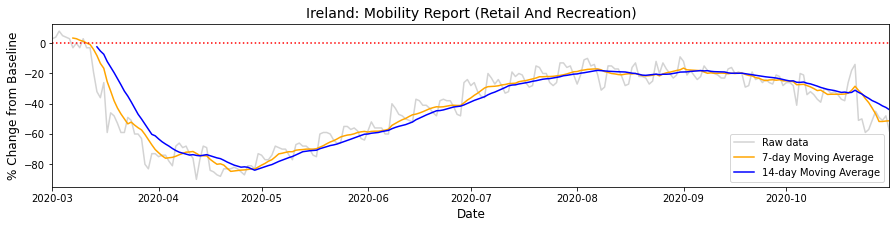

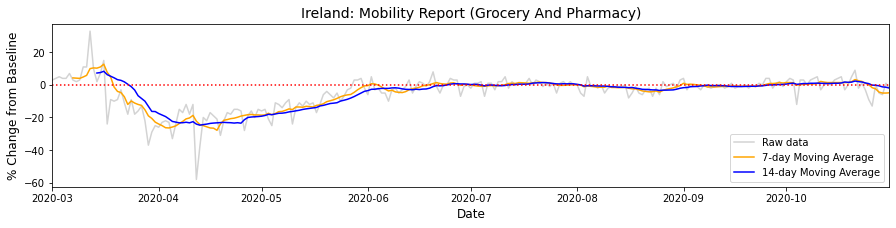

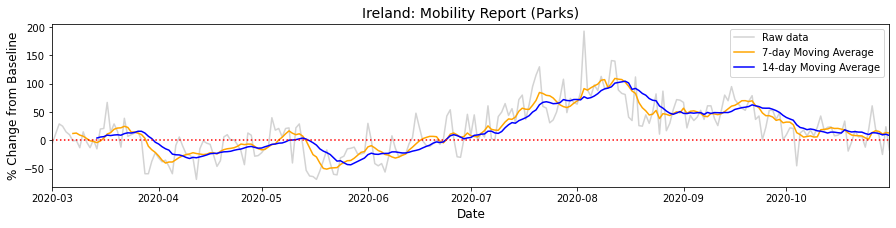

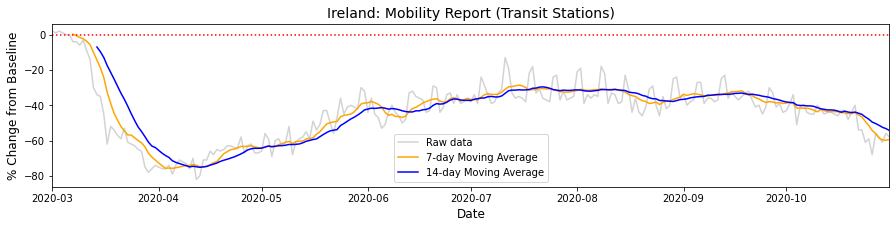

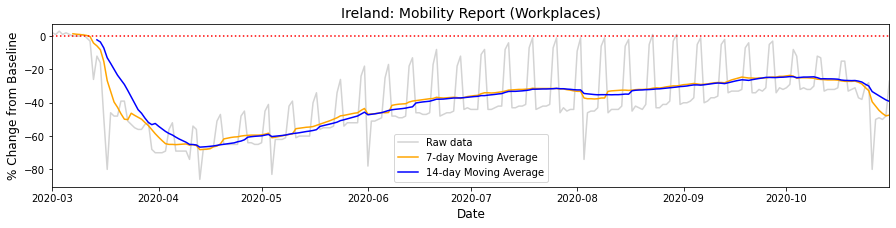

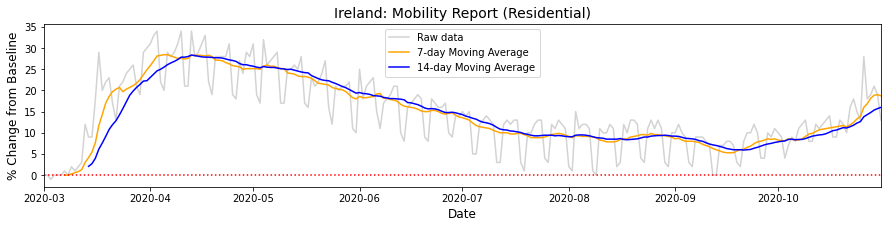

In [6]:
lineplot_rolling(df=ireland, separate=True)

- The plots above illustrate the time series data for the six location categories. 
- The raw data has quite a bit of noise, which can be smoothed by 7-day (orange line) and 14-day (blue line) moving averages, in order to get a clearer picture of the trends.
- The following inferences can be made from the plots:
    - The only categories with significant positive % change from baseline were `parks` and `residential`.
    - Mobility in `residential` regions increased early in April, and has been generally decreasing since then, with another gradual increase from October.  
    - `parks` saw the greatest % change from baseline, and the steepest ("uneven") changes at different stages, with clear troughs in April and May, and clear peaks in August and September.
    - The raw data lines for `workplaces` and `residential` also show seasonality, quite possibly due to mobility changing regularly on weekends, compared to weekdays, in these two categories.
    - Three categories: `retail_and_recreation`, `workplaces`, and `transit_stations` appear to move more or less in tandem with each other, dropping considerably in April/May, then gradually on the rise until October, when they slowly start falling again.
    - `grocery_and_pharmacy` seems to be the category with the least overall change in mobility, with the line staying close to the baseline almost throughout the plot. The only trough is in April (the first lockdown for COVID-19). 
   
Let's look at more accurate descriptive statistics for the categories.

In [7]:
ireland.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -40.502041             -4.795918   18.587755   
std                24.049918             10.046163   43.762556   
min               -90.000000            -58.000000  -69.000000   
25%               -60.000000            -10.000000  -12.000000   
50%               -34.000000             -2.000000   14.000000   
75%               -21.000000              1.000000   46.000000   
max                 8.000000             33.000000  193.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -43.404082  -38.306122    14.559184  
std           17.147264   20.755410     8.635229  
min          -82.000000  -86.000000    -1.000000  
25%          -56.000000  -51.000000     9.000000  
50%          -41.000000  -42.000000    13.000000  
75%          -34.000000  -30.000000    21.000000  
max            2.000000    3.000000    34.000000

- As expected from initial visual inspection, `parks` had the highest maximum positive % change from baseline, at 193% (in August, which is clear from the first raw data line plot).
- `transit_stations` had the lowest maximum positive % change from baseline, at a mere 2%.
- `retail_and_recreation`, `transit_stations` and `workplaces` all had between -80 to -90% minimum % change from baseline (more significant troughs compared to the other three categories). Looking at the line plots as well, we see that these three categories have troughs around the same time (April/May), when mobility in these outdoor regions decreased due to the first wave of COVID-19.
- Interestingly, `residential`'s minimum (trough) is only -1%, indicating that a large number of people have been following the restrictions imposed by the government, and staying at home.
- `parks` (18.59%) and `residential` (14.56%) both have a positive mean, while other categories have a negative mean % change in mobility.
- `transit_stations` have the most negative average % change in mobility (-43.4%), showing that the use of public transport has greatly decreased since the onset of the pandemic, closely followed by `retail_and_recreation` at -40.5%.
- As suspected from the line plots earlier, `grocery_and_pharmacy` has the mean closest to 0 (-4.79%).

Let's also visualise all the location categories together and try to compare them.

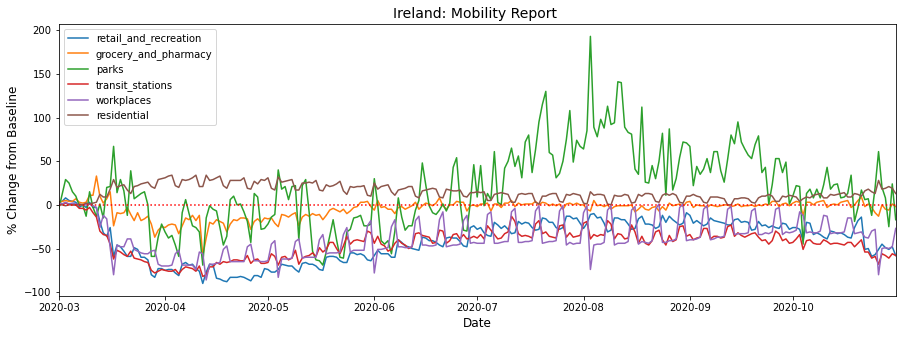

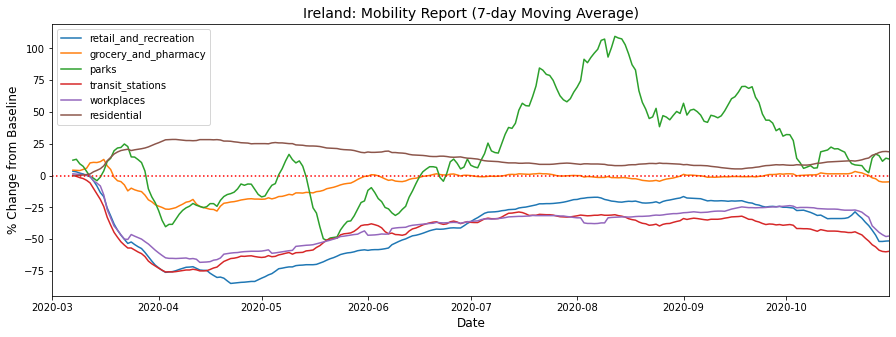

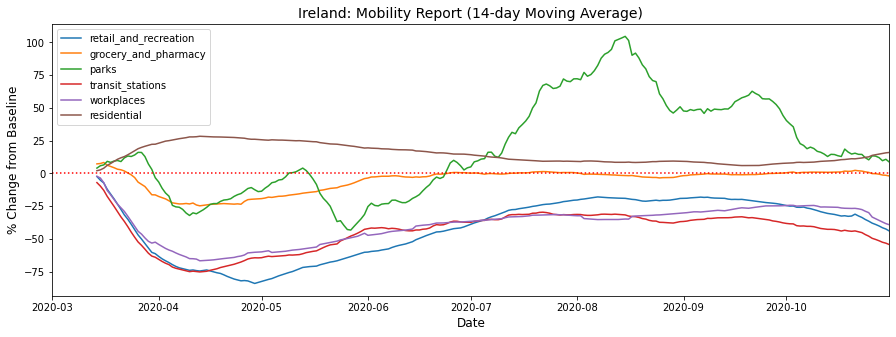

In [8]:
lineplot_rolling(df=ireland)

- Just as before, we apply smoothing (7-day/14-day moving averages) to reduce the noise in the raw data. 
- The peaks for `parks` are clearly visible, and the % change in mobility throughout the year is much more significant in magnitude compared to changes for other categories. This is possibly explained by more people trying to stay healthy and active: walks being the only outdoor activity for most people during lockdown, with #WorkFromHome in place. Moreover, there is also a seasonal effect, with the mobility in `parks` increasing at the onset of summer in Ireland.
- With the increase in COVID cases in September/October and the announcement of the second lockdown, we see a decrease in mobility for all categories except `residential`, which increased instead (people staying at home more often again).
- As suspected in the individual plots earlier, `retail_and_recreation`, `workplaces` and `transit_stations` have extremely similar line plots, with troughs around the first lockdown in April/May, followed by a gradual increase until October, when another decreasing trend was initiated by the second lockdown.
- `grocery_and_pharmacy` is the category that has changed the least with regards to mobility. This is only category that has reached pre-COVID levels of mobility consistently over the course of the past few months, thus reasserting the importance of these basic amenities.

In [9]:
def boxplot(df: pd.DataFrame, title: str = None, average: bool = False, palette: list = None) -> None:
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, palette=palette)
    plt.axhline([0], color='red', linestyle='dotted')
    if average:
        plt.title('Boxplot for Average % Change in Mobility', fontsize=14)
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Average % Change in Mobility', fontsize=12)
    else:
        plt.title(
            f"{df['country'][0]}: Boxplot for % Change in Mobility", fontsize=14)
        plt.xlabel('Location Category', fontsize=12)
        plt.ylabel('% Change in Mobility', fontsize=12)
    plt.show()

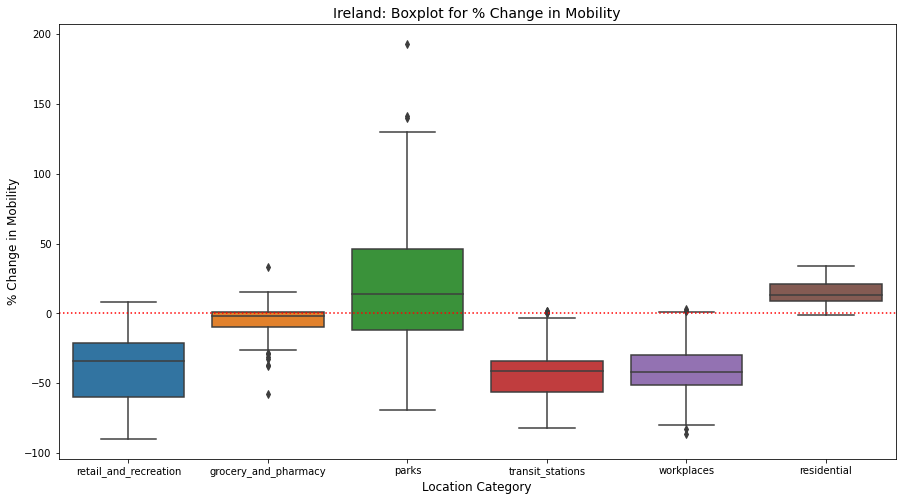

In [10]:
boxplot(df=ireland)

- The box plot above gives another perspective (five-number summary) on how the mobility for different location categories compare. 
- Similar to the trends observed in the line plots earlier, we see
    - significant positive % change for `parks` (upper extreme), and some for `residential` areas (upper extreme); 
    - `grocery_and_pharmacy` is more or less unchanged (median is nearly 0; extremes are not too far from baseline);  
    - significant negative % change (lower extreme) in `retail_and_recreation`, `transit_stations` and `workplaces`.
- `parks` is the category with the greatest range in extremes.
- Categories `grocery_and_pharmacy`, `parks` and `workplaces` have more outliers compared to the others.

Finally, the correlation between the series can be quantified with a heat map.

In [11]:
def heatmap(df: pd.DataFrame, title: str = None) -> None:
    plt.figure(figsize=(8, 6))
    sns.heatmap(data=df.corr(), annot=True)
    title = title if title else f"{df['country'][0]}: Pairwise Correlation for Location Categories"
    plt.title(title, fontsize=14)
    plt.show()

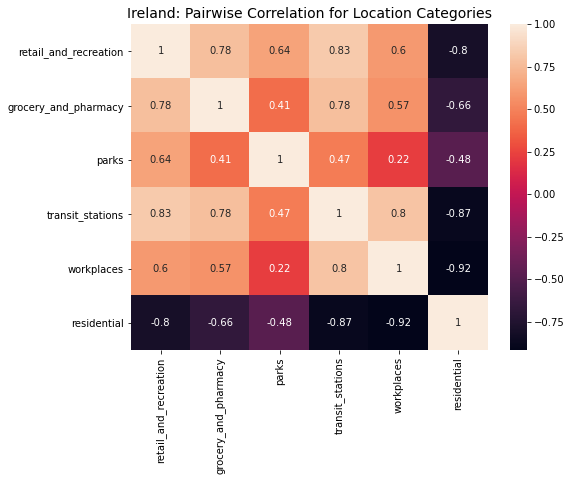

In [12]:
heatmap(df=ireland)

- One thing immediately stands out in the above heat map: `residential` has a moderate to strong negative correlation with every other location category. 
- This makes sense because because with more people staying at home during the pandemic, the mobility in other location categories decreases. 
- In particular, correlation between `residential` and `workplaces` (-0.92), `transit_stations` (-0.87) and `retail_and_recreation` (-0.8) are extremely strong. With a large number of people working from home during the lockdown period, using public transport much less often, and limiting their group recreational activities, the observed correlations are to be expected.
- Moderately strong positive correlations exist between `transit_stations` and `workplaces` (0.8), `retail_and_recreation` (0.83), and `grocery_and_pharmacy` (0.78), which shows that a lot of people use public transport to reach workplaces, recreational locations, grocery stores, etc. An increase/decrease in  `transit_stations` mobility often showed a corresponding increase/decrease in the the other mentioned categories.
- On the other hand, `parks` are not strongly correlated with any other category, since people usually walk to parks (especially the ones inside the 5 km radius in Ireland), and can do so independently of other location categories.

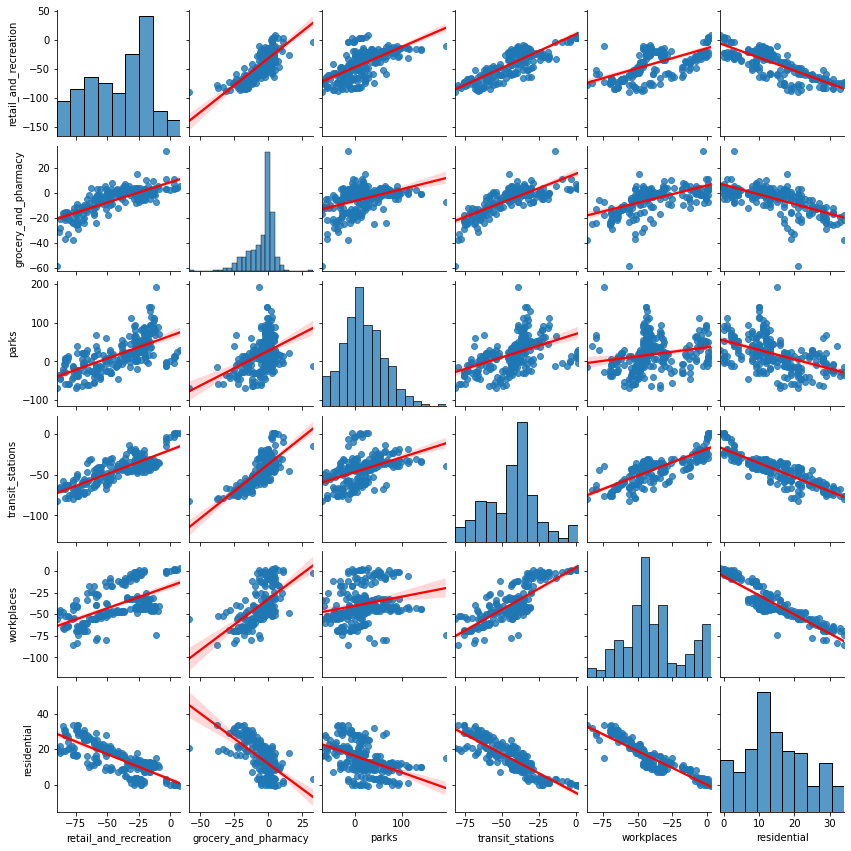

In [13]:
sns.pairplot(ireland, height=2, kind="reg",
             plot_kws={'line_kws': {'color': 'red'}})
plt.show()

The scatter matrix above summarises the correlation between the various location category pairs, with positive slope trend lines indicating positive correlation, and negative slope trend lines indicating negative correlation.

<h3 style='color: #d62727'>(II) New Zealand</h3>

Moving on to our second country, let's read in the mobility data for New Zealand, and apply the same reformat function as before.

In [14]:
nz = reformat(pd.read_csv('../data/a2/new_zealand.csv',
                          index_col='date', parse_dates=True))
nz

country  retail_and_recreation  grocery_and_pharmacy  parks  \
date                                                                          
2020-03-01  New Zealand                    1.0                   4.0   -1.0   
2020-03-02  New Zealand                   -4.0                  -1.0  -10.0   
2020-03-03  New Zealand                   -4.0                   0.0   -6.0   
2020-03-04  New Zealand                   -2.0                   0.0  -17.0   
2020-03-05  New Zealand                    0.0                   1.0  -15.0   
...                 ...                    ...                   ...    ...   
2020-10-27  New Zealand                   -6.0                  -3.0   -9.0   
2020-10-28  New Zealand                   -2.0                  -4.0   -7.0   
2020-10-29  New Zealand                   -2.0                  -4.0  -16.0   
2020-10-30  New Zealand                    2.0                  -3.0  -16.0   
2020-10-31  New Zealand                    7.0                   0.0  -16.0   

            transit_stations  workplaces  residential  
date                                                   
2020-03-01               8.0         1.0          1.0  
2020-03-02              16.0        34.0         -2.0  
2020-03-03               8.0        17.0         -1.0  
2020-03-04               9.0        16.0         -1.0  
2020-03-05              10.0        20.0         -1.0  
...                      ...         ...          ...  
2020-10-27             -28.0         0.0          3.0  
2020-10-28             -26.0         4.0          2.0  
2020-10-29             -26.0         8.0          2.0  
2020-10-30             -26.0         7.0          2.0  
2020-10-31             -26.0         2.0          2.0  

[245 rows x 7 columns]

In [15]:
nz.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-03-01 to 2020-10-31
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                245 non-null    object 
 1   retail_and_recreation  245 non-null    float64
 2   grocery_and_pharmacy   245 non-null    float64
 3   parks                  245 non-null    float64
 4   transit_stations       245 non-null    float64
 5   workplaces             245 non-null    float64
 6   residential            245 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.3+ KB


- Great! There is no missing data. 
- Just as before, we have six different location categories as columns in our dataset (`retail_and_recreation`, `grocery_and_pharmacy`, `parks`, `transit_stations`, `workplaces`, and `residential`). 
- Plots will be constructed for characterisation, visualisation and analysis of our data. 
- The functions for line plots, box plots, and heat maps defined earlier will be reused here!

First, let's also look at each of the location plots separately. For each category, we'll display the raw data, 7-day moving average, and 14-day moving average with different colours on the same plot. 

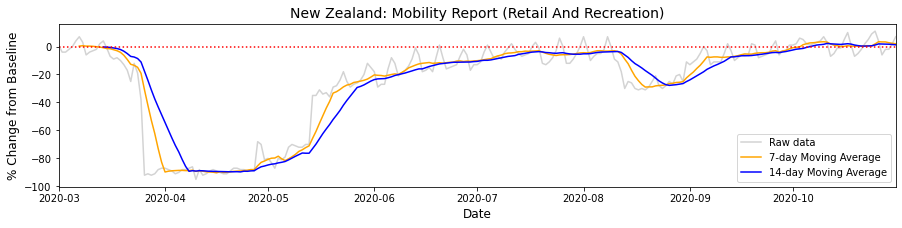

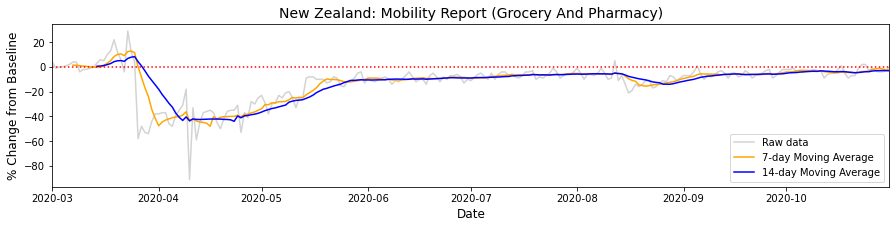

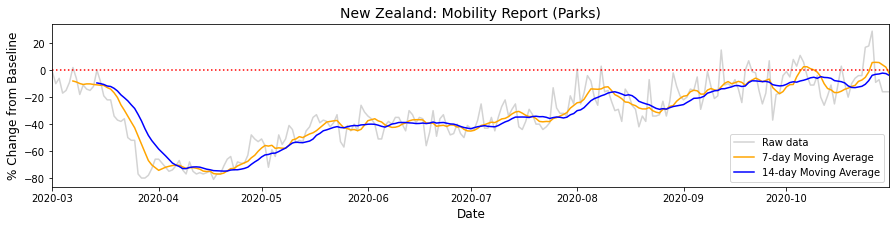

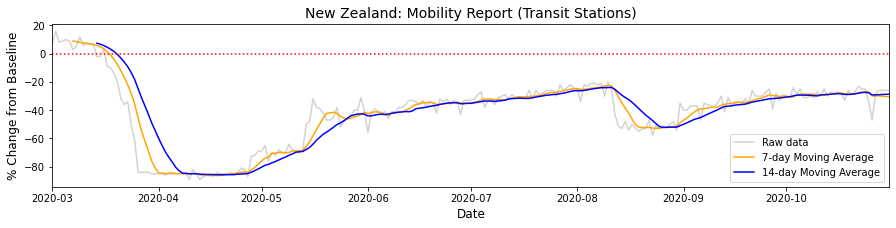

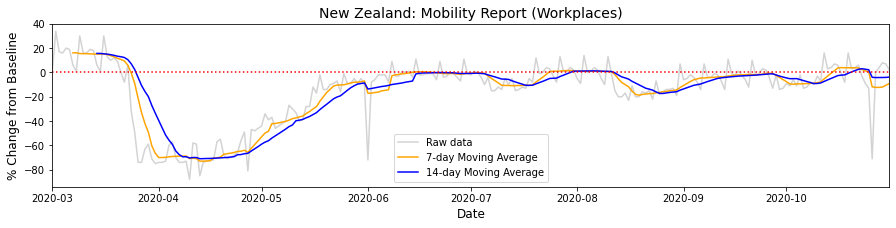

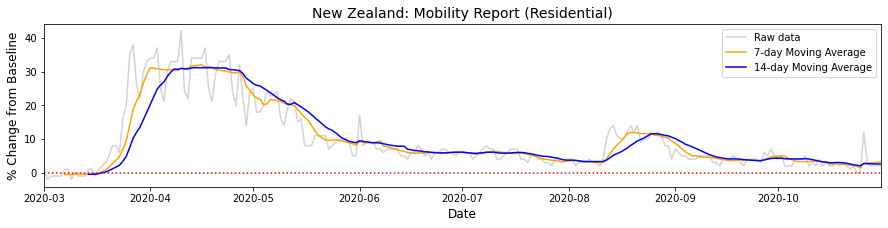

In [16]:
lineplot_rolling(df=nz, separate=True)

- The plots above illustrate the time series data for the six location categories. 
- The raw data has quite a bit of noise, which can be smoothed by 7-day (orange line) and 14-day (blue line) moving averages, in order to get a clearer picture of the trends.
- The following inferences can be made from the plots:
    - `residential` mobility peaked in April, while all other categories experienced a trough at the time, when the first wave of COVID-19 hit New Zealand.
    - All categories have been gradually approaching the baseline starting at the end of May.
    - There are minor troughs in `retail_and_recreation`, `grocery_and_pharmacy`, `parks`, `transit_stations` and `workplaces` at the end of August, signifying the small second wave of the virus that the country endured. A corresponding peak in `residential` areas during that time is also visible.
    - Interestingly, the mobility for `workplaces` has remained very close to the baseline since the month of June, since most New Zealanders have returned to work after the disease was brought under control in the country (to a great extent).
   
Let's look at more accurate descriptive statistics for the categories.

In [17]:
nz.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -24.563265            -12.028571  -32.506122   
std                31.930654             14.981792   23.230248   
min               -95.000000            -91.000000  -81.000000   
25%               -30.000000            -13.000000  -45.000000   
50%               -11.000000             -8.000000  -33.000000   
75%                -3.000000             -4.000000  -15.000000   
max                11.000000             29.000000   29.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -41.081633  -14.934694     9.787755  
std           23.702594   26.051412     9.902178  
min          -89.000000  -88.000000    -2.000000  
25%          -52.000000  -19.000000     4.000000  
50%          -35.000000   -7.000000     6.000000  
75%          -28.000000    0.000000    12.000000  
max           16.000000   34.000000    42.000000

- Commendably, `residential` areas had the highest maximum positive % change in mobility, at 42%, as well as the only positive mean % change of 9.78%. This shows how the people of New Zealand have stayed at home and played their part in beating the virus in the country.
- `retail_and_recreation` had the lowest maximum positive % change from baseline, at 11%.
- All regions (other than `residential` of course) had significant minimum negative % change in mobility (all lower than -80%), with `retail_and_recreation` as low as -95%. This shows the great sacrifices that New Zealanders have shown in cutting down their number of close contacts, in the battle against COVID-19.
- All categories (except `residential`) have a negative average % change in mobility, with `transit_stations` having the minimum average of -41%, indicating that the use of public transport was nowhere close to pre-COVID levels.

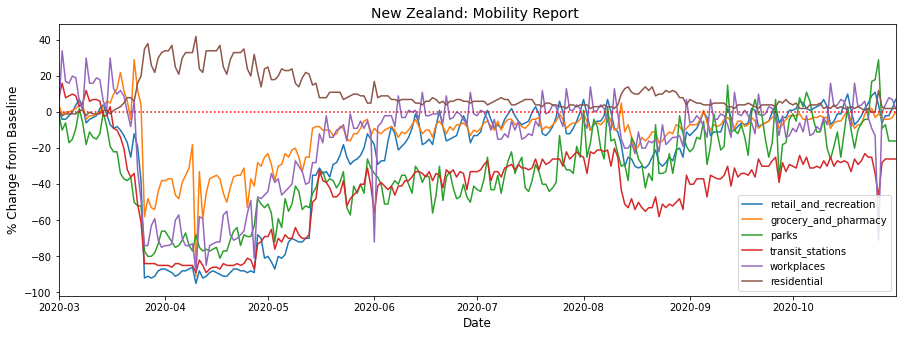

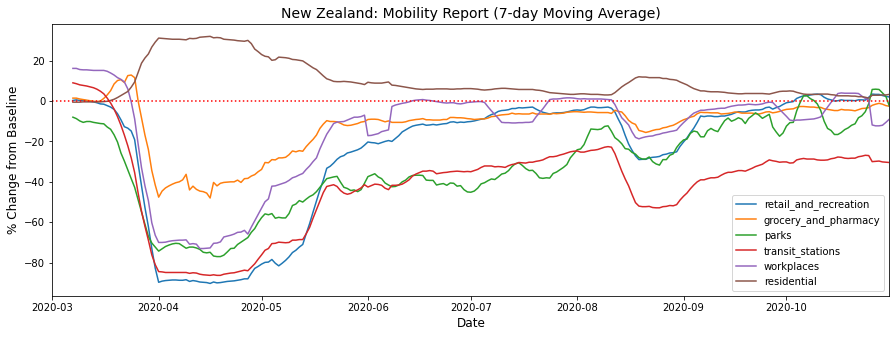

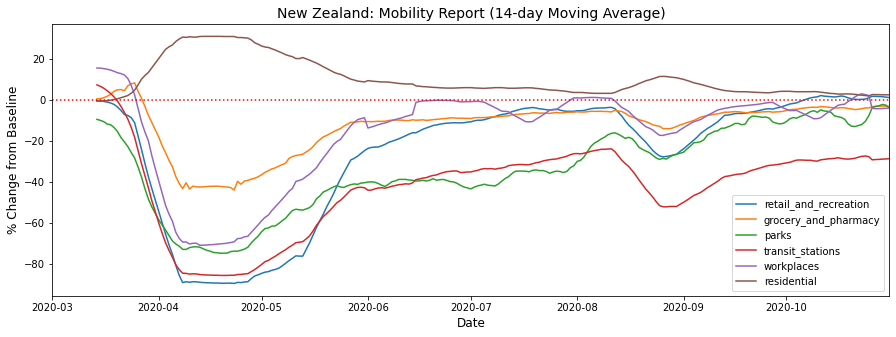

In [18]:
lineplot_rolling(df=nz)

- Just as before, we apply smoothing (7-day/14-day moving averages) to reduce the noise in the raw data. 
- The two main peaks for `residential` areas (April and August) clearly indicate the two waves of COVID-19 in the country, with the second wave being much less intense compared to the first.
- Similarly, the two main troughs for every other category (apart from `residential`) are also visible in April and August.
- As seen earlier, `residential`, `workplaces`, `grocery_and_pharmacy`, `retail_and_recreation` started nearly approaching the baseline in June, with `parks` catching up in mid-September. This makes sense because New Zealand dropped to single digits for the number of COVID-19 cases in May, and consistently maintained that level until a minor second spike in August. Overall, the country has done extremely well in battling the virus.
- `transit_stations` remain as the only category with much less mobility compared to the baseline, with people still avoiding public transport where possible.

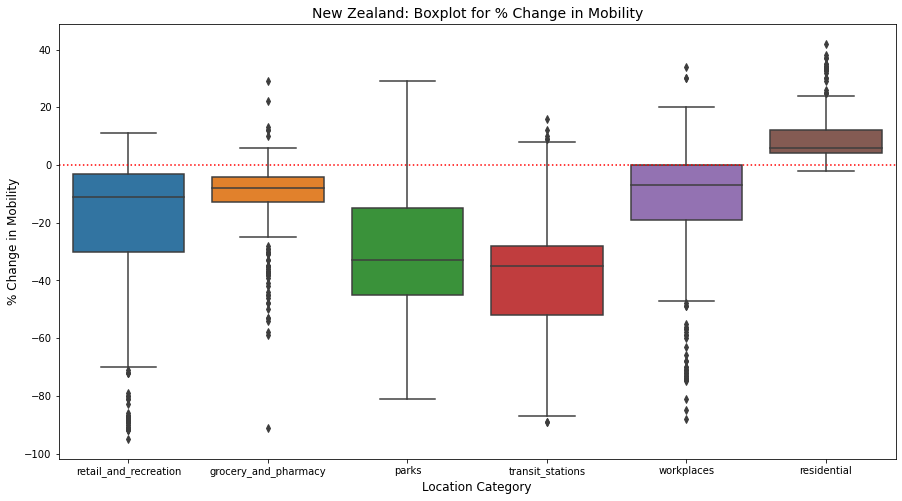

In [19]:
boxplot(df=nz)

- The box plot above gives another perspective on how the mobility for different location categories compare. 
- Similar to the trends observed in the line plots earlier, we see 
    - some positive % change for `residential` areas (upper extreme and outliers); 
    - `grocery_pharmacy` (lower extreme) only has a slight decrease compared to other categories;  
    - significant negative % change (lower extreme) in `parks`, `transit_stations`, and `retail_and_recreation`.
- `parks` appear to be the category with the greatest range in extremes, but there is a close contest with `transit_stations`.
- Categories `retail_and_recreation`, `grocery_and_pharmacy`, `workplaces` and `residential` have a large number of outliers.

Finally, the correlation between the series can be quantified with a heat map.

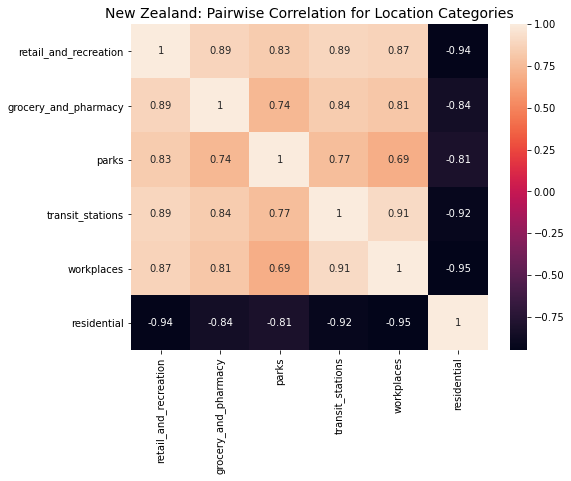

In [20]:
heatmap(df=nz)

- `residential` has strong negative correlation with every other location category, with a large number of people staying at home during the initial wave of the pandemic in New Zealand.
- In particular, correlation between `residential` and `workplaces` (-0.95), `retail_and_recreation` (-0.94), and `transit_stations` (-0.92) are extremely strong. With a large number of people working from home during the lockdown period, using public transport much less often, and limiting their group recreational activities, the observed correlations are to be expected.
- Strong positive correlations also exist between `transit_stations` and `workplaces` (0.91), `retail_and_recreation` (0.89), and `grocery_and_pharmacy` (0.84), which shows that a lot of people use public transport to reach workplaces, recreational locations, grocery stores, etc. An increase/decrease in  `transit_stations` mobility often showed a corresponding increase/decrease in the the other mentioned categories. 
- `parks` in New Zealand have a moderately strong correlation with other categories, possibly suggesting that a lot of people restricted all kinds of movement outdoors during the initial wave of the disease. It is also worth noting that New Zealand being in the Southern Hemisphere experienced winter during the summer months of the Northern Hemisphere, hence going to `parks` and other outdoor activities is expected to be limited.

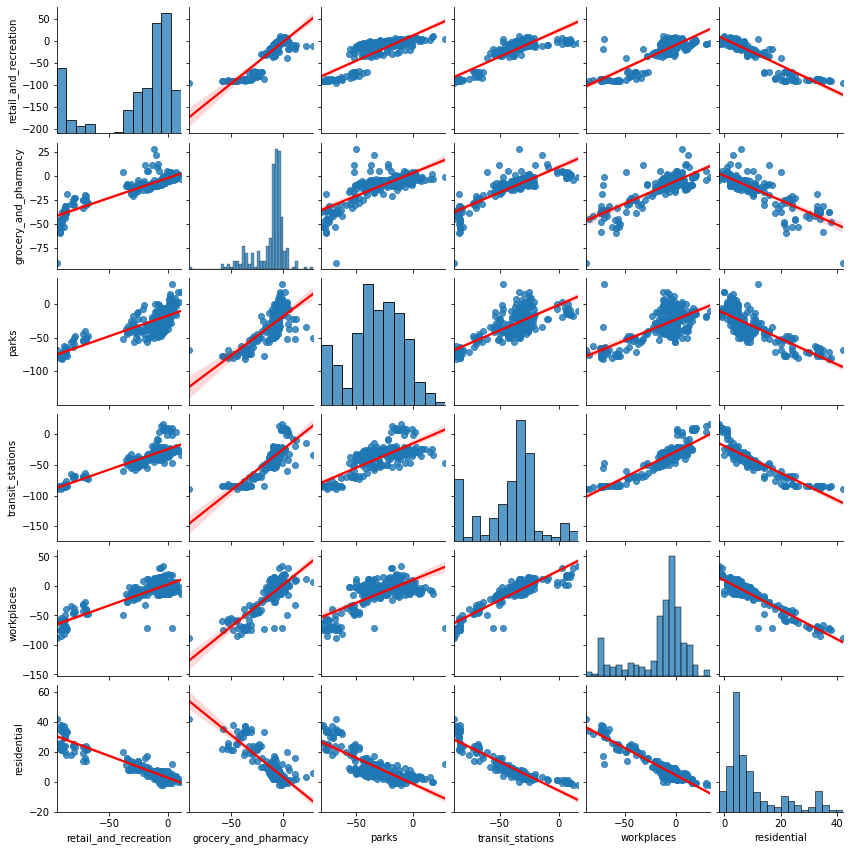

In [21]:
sns.pairplot(nz, height=2, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
plt.show()

The scatter matrix above summarises the correlation between the various location category pairs, with positive slope trend lines indicating positive correlation, and negative slope trend lines indicating negative correlation.

<h3 style='color: #1f76b4'>(III) United States</h3>

We'll apply the same pre-processing steps for our third and final country under consideration, U.S.A. 

In [22]:
usa = reformat(pd.read_csv('../data/a2/united_states.csv',
                           index_col='date', parse_dates=True))
usa

country  retail_and_recreation  grocery_and_pharmacy  parks  \
date                                                                            
2020-03-01  United States                   13.0                   9.0   18.0   
2020-03-02  United States                    7.0                   6.0   10.0   
2020-03-03  United States                   11.0                  10.0   20.0   
2020-03-04  United States                    8.0                   6.0   17.0   
2020-03-05  United States                    8.0                   7.0   21.0   
...                   ...                    ...                   ...    ...   
2020-10-27  United States                  -17.0                  -7.0    1.0   
2020-10-28  United States                  -16.0                  -7.0   -2.0   
2020-10-29  United States                  -17.0                  -7.0   -6.0   
2020-10-30  United States                  -14.0                  -4.0    1.0   
2020-10-31  United States                  -16.0                   2.0   27.0   

            transit_stations  workplaces  residential  
date                                                   
2020-03-01               7.0         3.0         -1.0  
2020-03-02               2.0         3.0         -1.0  
2020-03-03               3.0         2.0         -1.0  
2020-03-04               2.0         3.0         -1.0  
2020-03-05               2.0         3.0         -1.0  
...                      ...         ...          ...  
2020-10-27             -33.0       -31.0         10.0  
2020-10-28             -34.0       -30.0         10.0  
2020-10-29             -35.0       -31.0         10.0  
2020-10-30             -32.0       -30.0          8.0  
2020-10-31             -23.0       -10.0          3.0  

[245 rows x 7 columns]

In [23]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-03-01 to 2020-10-31
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                245 non-null    object 
 1   retail_and_recreation  245 non-null    float64
 2   grocery_and_pharmacy   245 non-null    float64
 3   parks                  245 non-null    float64
 4   transit_stations       245 non-null    float64
 5   workplaces             245 non-null    float64
 6   residential            245 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.3+ KB


- Great! There is no missing data. 
- Just as before, we have six different location categories as columns in our dataset (`retail_and_recreation`, `grocery_and_pharmacy`, `parks`, `transit_stations`, `workplaces`, and `residential`). 
- Plots will be constructed for characterisation, visualisation and analysis of our data. 
- The functions for line plots, box plots, and heat maps defined earlier will be reused here!

First, let's also look at each of the location plots separately. For each category, we'll display the raw data, 7-day moving average, and 14-day moving average with different colours on the same plot. 

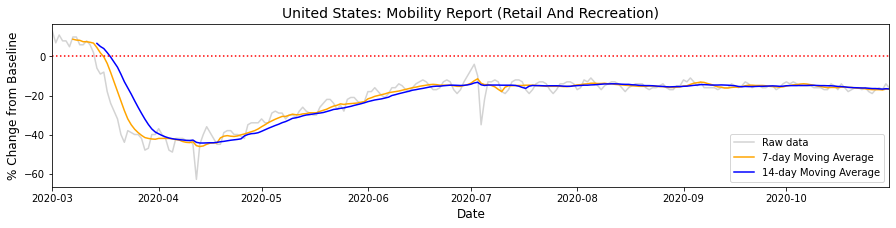

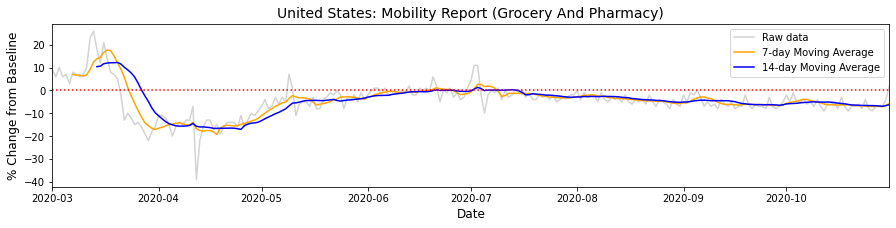

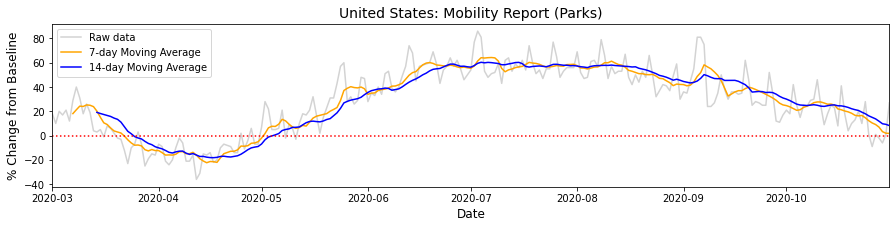

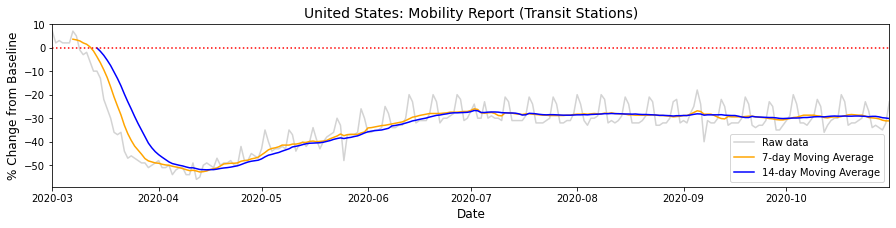

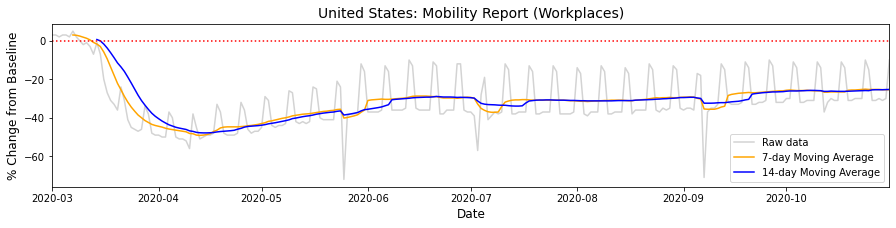

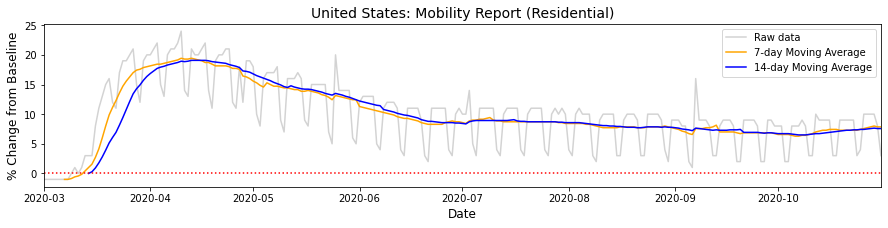

In [24]:
lineplot_rolling(df=usa, separate=True)

- The plots above illustrate the time series data for the six location categories. 
- The raw data has quite a bit of noise, which can be smoothed by 7-day (orange line) and 14-day (blue line) moving averages, in order to get a clearer picture of the trends.
- The following inferences can be made from the plots:
    - The only categories with significant positive % change from baseline were `parks` and `residential`.
    - Mobility in `residential` regions increased early in April, and has been generally decreasing since then, reaching a more or less stable level around 10% from baseline, July onward.
    - `parks` saw the greatest % change from baseline, with the peak in the middle of summer (July/August).  
    - The changes in the 7-day/14-day moving averages for all categories have been gradual over the course of the past few months, with no steep increases or decreases (other than the initial shock of the first wave of the virus).
    - The raw data lines for `workplaces`, `transit_stations`, `residential` also show seasonality, quite possibly due to mobility changing regularly on weekends, compared to weekdays, in these categories.
    - `grocery_and_pharmacy` seems to be the category with the least overall change in mobility, with the line staying close to the baseline almost throughout the plot. The only trough is in April. 
   
Let's look at more accurate descriptive statistics for the categories.

In [25]:
usa.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -20.008163             -4.248980   28.902041   
std                12.381567              7.318798   27.327825   
min               -63.000000            -39.000000  -36.000000   
25%               -27.000000             -7.000000    6.000000   
50%               -16.000000             -4.000000   30.000000   
75%               -14.000000             -1.000000   52.000000   
max                13.000000             26.000000   86.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -31.881633  -31.146939     9.946939  
std           11.811978   13.932612     5.688034  
min          -56.000000  -72.000000    -1.000000  
25%          -37.000000  -38.000000     7.000000  
50%          -32.000000  -36.000000    10.000000  
75%          -27.000000  -24.000000    13.000000  
max            7.000000    5.000000    24.000000

- As expected from initial visual inspection, `parks` had the highest maximum positive % change from baseline, at 86% (in July, which is clear from the first raw data line plot).
- `workplaces` had the lowest maximum positive % change from baseline, at a mere 5%.
- `retail_and_recreation` and `workplaces` had -63% and -72% minimum change from baseline respectively (more significant troughs compared to the other categories). Looking at the line plots as well, we see that these three categories have troughs around the same time (April/May), when mobility in these outdoor regions decreased due to the first wave of COVID-19.
- `parks`(28.9%) and `residential` (9.95%) both have a positive mean, while other categories have a negative average % change in mobility.
- `transit_stations` have the most negative average % change in mobility (-31.88%), showing that the use of public transport has greatly decreased since the onset of the pandemic, closely followed by `workplaces` at -31.15%.
- As suspected from the line plots earlier, `grocery_and_pharmacy` have the mean closest to 0 (-4.25%).

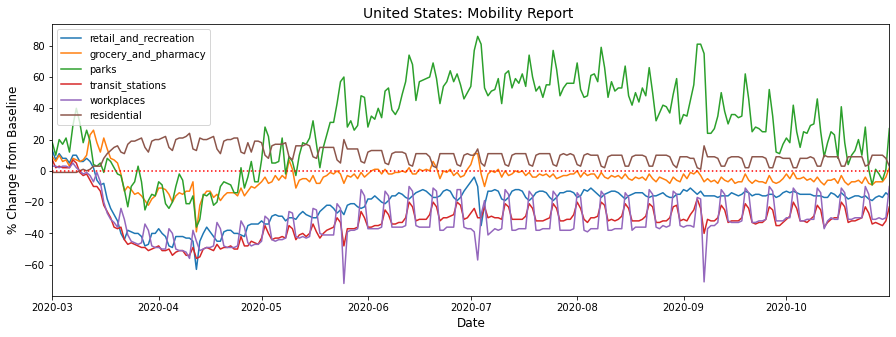

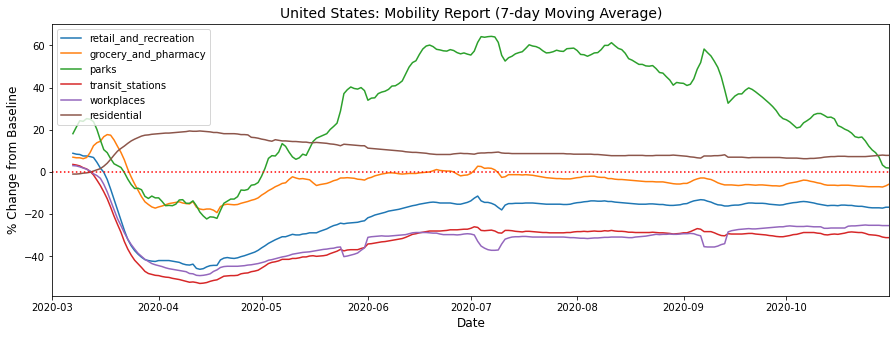

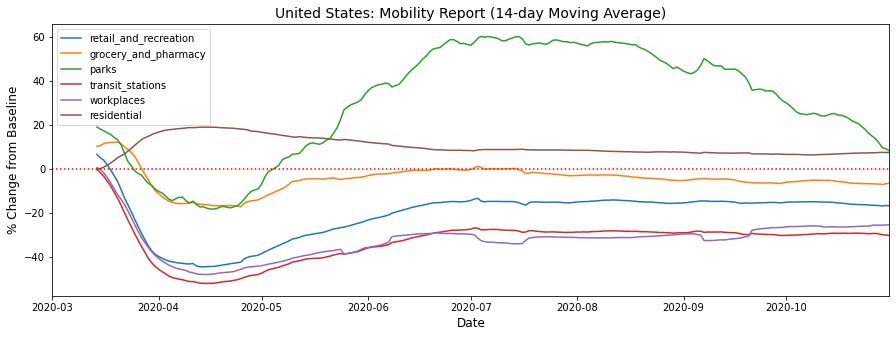

In [26]:
lineplot_rolling(df=usa)

- Just as before, we apply smoothing (7-day/14-day moving averages) to reduce the noise in the raw data. 
- The magnitude of positive % change for `parks` is much more significant compared to all other categories, as is clearly visible from the steep mobility increase starting as early as April, and only starting to decrease around September. This is possibly explained by more people trying to stay healthy and active: walks being the only outdoor activity for most people during lockdown. Moreover, there is a seasonal effect, with the mobility in `parks` increasing during the summer months in the United States.
- Categories `retail_and_recreation`, `workplaces` and `transit_stations` have similar line plots, with troughs during the first wave of COVID-19 in April/May, followed by a gradual increase until July, where each of these categories has more or less reached a plateau. The lack of change in mobility is unfortunate, since the number of new COVID-19 cases in the United States has been generally increasing since the very beginning, with only short-lived periods of decreasing trends. After the initial spike of cases in April, the U.S. has faced two more intense (and more deadly) spikes in cases around July and October, and yet, the mobility has remained more or less constant since July. Undoubtedly, people in the country need to put greater effort in following the COVID-19 restrictions and guidelines, and reduce their mobility and close personal contacts as much as possible if the virus is to be brought under control; at least until the mass circulation of the vaccine is underway.
- `grocery_and_pharmacy` is the category that has changed the least with regards to mobility. This is only category that has reached pre-COVID levels of mobility consistently over the course of the past few months, thus reasserting the importance of these basic amenities.

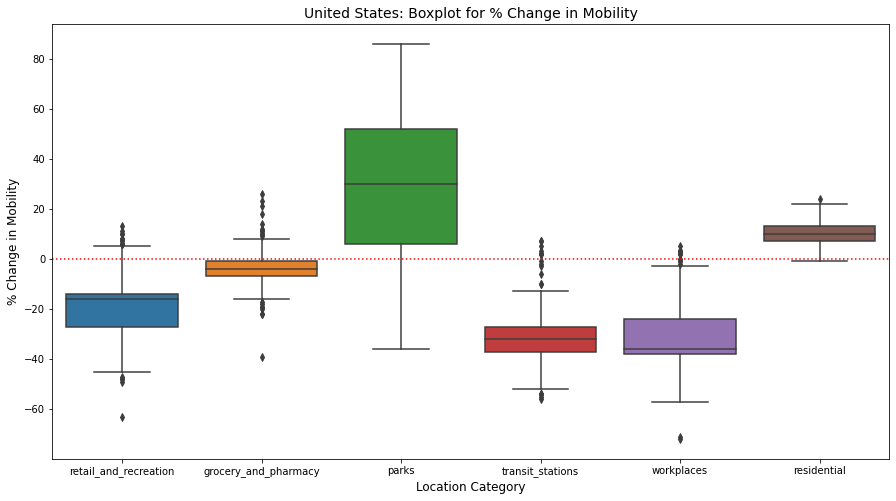

In [27]:
boxplot(df=usa)

- The box plot above gives another perspective on how the mobility for different location categories compare. 
- Similar to the trends observed in the line plots earlier, we see 
    - significant positive % change for `parks` (median is well above baseline) and `residential` areas (even the lower extreme is almost at the baseline); 
    - `grocery_and_pharmacy` has a median very close to the baseline, and small range of extremes; 
    - significant negative % change (lower extremes) in `retail_and_recreation`, `transit_stations` and `workplaces`, and yet their upper extremes are close to or above the baseline.
    - `parks` is the category with the greatest range in extremes.
    - `retail_and_recreation`, `grocery_and_pharmacy`, `transit_stations` and `workplaces` have a large number of outliers.

Finally, the correlation between the series can be quantified with a heat map.

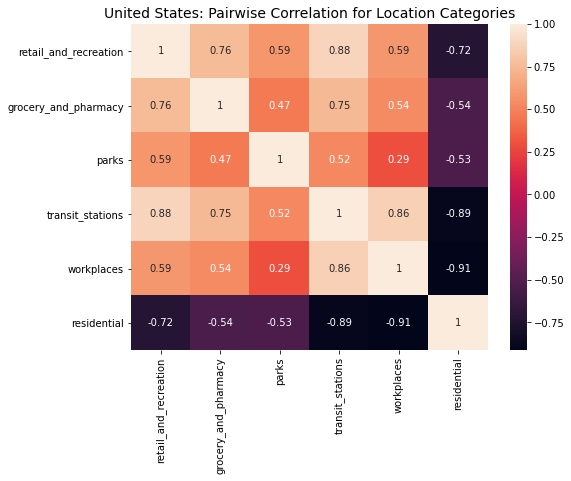

In [28]:
heatmap(df=usa)

- `residential` has a moderate to strong negative correlation with every other location category. 
- This makes sense because because with more people staying at home during the pandemic, the mobility in other location categories decreases. 
- In particular, correlation between `residential` and `workplaces` (-0.91), `transit_stations` (-0.89) and `retail_and_recreation` (-0.72) are extremely strong. With a large number of people working from home during the lockdown period, using public transport much less often, and limiting their group recreational activities, the observed correlations are to be expected.
- Strong positive correlations also exist between `transit_stations` and `workplaces` (0.86), `retail_and_recreation` (0.88), and `grocery_and_pharmacy` (0.75), which shows that a lot of people use public transport to reach workplaces, recreational locations, grocery stores, etc.  An increase/decrease in  `transit_stations` mobility often showed a corresponding increase/decrease in the the other mentioned categories.
- On the other hand, `parks` are not too strongly correlated with any other category, since people usually walk to parks, and can do so independently of other location categories.

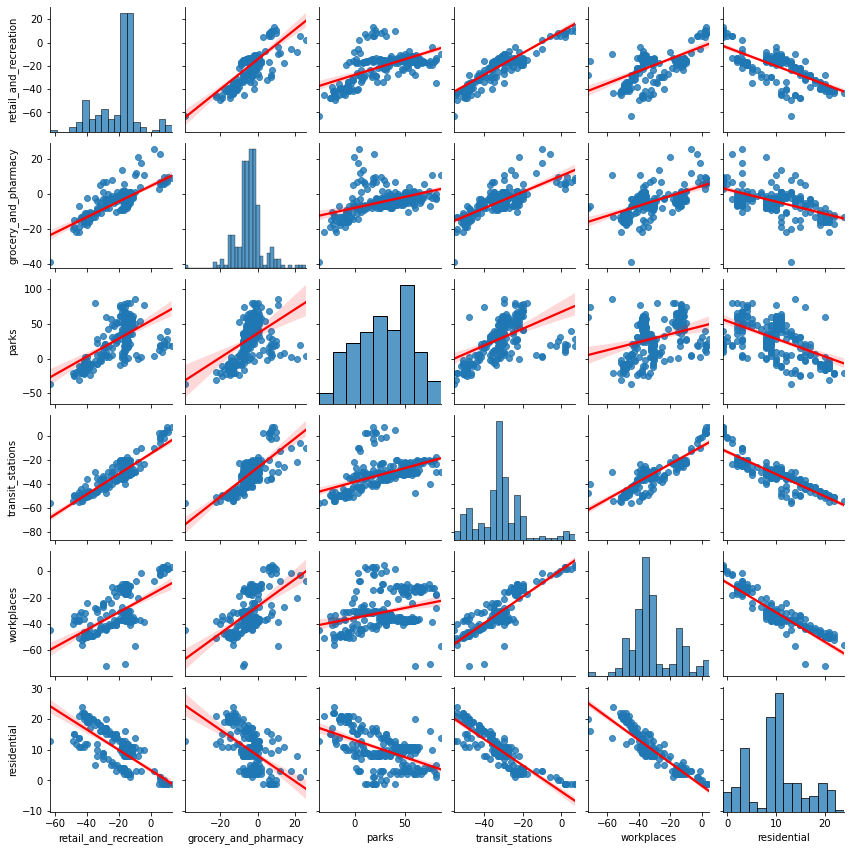

In [29]:
sns.pairplot(usa, height=2, kind="reg", plot_kws={
             'line_kws': {'color': 'red'}})
plt.show()

The scatter matrix above summarises the correlation between the various location category pairs, with positive slope trend lines indicating positive correlation, and negative slope trend lines indicating negative correlation.

## Task 2: Between-country analysis.

The second task focusses on analysing the three countries together. The overall mobility of each country is computed as the the average percentage change from baseline for all of the 6 different location categories. For all the countries together, we will do the following:
- Time series construction for overall mobility patterns
- Characterisation and visualisation
- Comparison of overall mobility for the three countries
- Individual location category-wise comparison for the three countries 
- Outline possible reasons for observed differences

### (I) Overall mobility comparison for the three countries.

In [30]:
overall = pd.concat([ireland, nz, usa])
overall.set_index('country', append=True, inplace=True)
overall

retail_and_recreation  grocery_and_pharmacy  parks  \
date       country                                                             
2020-03-01 Ireland                          3.0                   3.0   -5.0   
2020-03-02 Ireland                          4.0                   4.0   12.0   
2020-03-03 Ireland                          8.0                   5.0   29.0   
2020-03-04 Ireland                          5.0                   4.0   25.0   
2020-03-05 Ireland                          4.0                   4.0   15.0   
...                                         ...                   ...    ...   
2020-10-27 United States                  -17.0                  -7.0    1.0   
2020-10-28 United States                  -16.0                  -7.0   -2.0   
2020-10-29 United States                  -17.0                  -7.0   -6.0   
2020-10-30 United States                  -14.0                  -4.0    1.0   
2020-10-31 United States                  -16.0                   2.0   27.0   

                          transit_stations  workplaces  residential  
date       country                                                   
2020-03-01 Ireland                     2.0         2.0          0.0  
2020-03-02 Ireland                     1.0         1.0          0.0  
2020-03-03 Ireland                     2.0         3.0         -1.0  
2020-03-04 Ireland                     1.0         1.0          0.0  
2020-03-05 Ireland                     0.0         2.0          0.0  
...                                    ...         ...          ...  
2020-10-27 United States             -33.0       -31.0         10.0  
2020-10-28 United States             -34.0       -30.0         10.0  
2020-10-29 United States             -35.0       -31.0         10.0  
2020-10-30 United States             -32.0       -30.0          8.0  
2020-10-31 United States             -23.0       -10.0          3.0  

[735 rows x 6 columns]

In [31]:
# average of all six categories
overall['mobility'] = overall.mean(axis=1)
overall = overall[['mobility']]
overall.head()

mobility
date       country          
2020-03-01 Ireland  0.833333
2020-03-02 Ireland  3.666667
2020-03-03 Ireland  7.666667
2020-03-04 Ireland  6.000000
2020-03-05 Ireland  4.166667

In [32]:
# split the country column into three separate columns
overall = overall.unstack('country')
overall.head()

mobility                          
country      Ireland New Zealand United States
date                                          
2020-03-01  0.833333    2.333333      8.166667
2020-03-02  3.666667    5.500000      4.500000
2020-03-03  7.666667    2.333333      7.500000
2020-03-04  6.000000    0.833333      5.833333
2020-03-05  4.166667    2.500000      6.666667

In [33]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-03-01 to 2020-10-31
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (mobility, Ireland)        245 non-null    float64
 1   (mobility, New Zealand)    245 non-null    float64
 2   (mobility, United States)  245 non-null    float64
dtypes: float64(3)
memory usage: 7.7 KB


Great! We have the same number of rows (and no missing data) as each of the individual country DataFrames. There are three separate columns (average % change in mobility), one for each of the three countries. The overall mobility DataFrame is now ready for characterisation, visualisation and analysis.

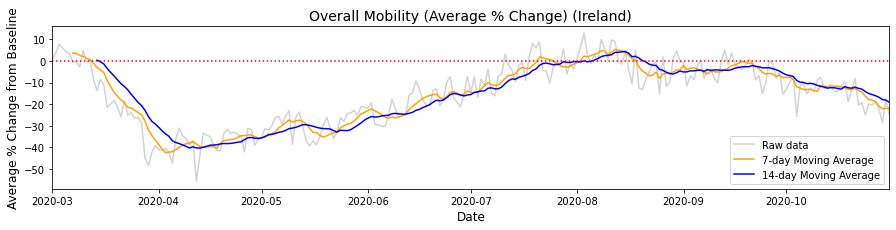

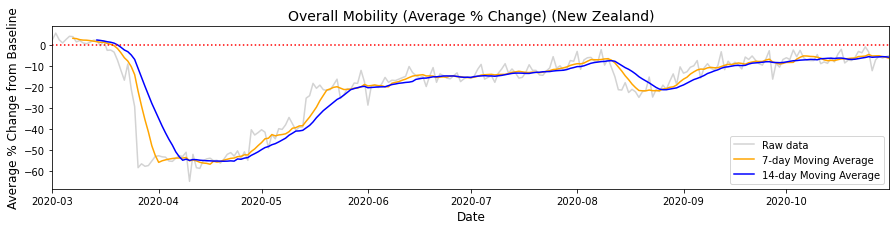

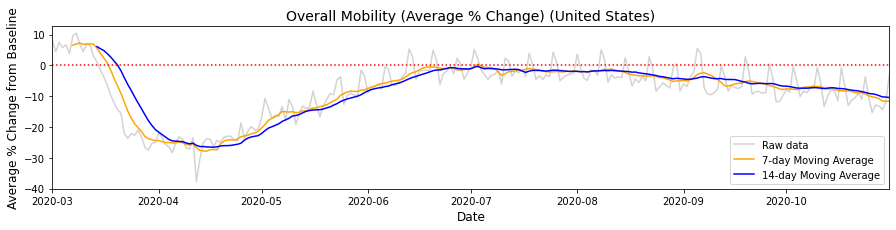

In [34]:
lineplot_rolling(df=overall['mobility'], separate=True, countries=True)

From the above three individual line plots, we see
- The initial COVID-19 spike is visible for each of the three countries, with a trough for mobility in April 2020. New Zealand's average mobility seems to have decreased by the greatest amount (more than Ireland and U.S.A.) during the first wave of the pandemic.
- By and large, each country's overall mobility has been approaching the baseline since May.
- There is a hint of seasonality for United States, which is not as evident for Ireland and New Zealand.
- Looking at the 14-day moving averages, there are two distinct troughs visible for New Zealand, which is not the case for Ireland and the United States.
- Ireland is the only country whose overall mobility crossed the baseline (not considering early March) and reached a slight positive value in August.
- The 14-day moving average trend lines have been decreasing (away from baseline) for both Ireland and New Zealand since September, whereas New Zealand has been approaching the baseline during the same period.
- In general, Ireland's trend line is more uneven compared to those for New Zealand and United States. Apart from New Zealand's two clear troughs (April and August) and United States' initial trough (April), both countries' 14-day trend lines have been quite smooth (gradual changes) for both increase and decrease phases.

In [35]:
overall.describe()

mobility                          
country     Ireland New Zealand United States
count    245.000000  245.000000    245.000000
mean     -15.643537  -19.221088     -8.072789
std       14.485552   17.021342      9.152487
min      -55.666667  -64.833333    -37.666667
25%      -26.166667  -21.666667    -13.000000
50%      -13.666667  -14.500000     -6.500000
75%       -3.666667   -7.500000     -1.833333
max       12.833333    5.500000     10.500000

We can make the following conclusions from the descriptive statistics above:
- Ireland's overall mobility saw the greatest maximum, at 12.83%, closely followed by United States at 10.5%.
- New Zealand had the most negative minimum at -64.83%, showing how the country greatly reduced mobility in order to get the pandemic under control. This is followed by -55.67% in Ireland, which is doing reasonably well by European Union standards; and finally, United States at -37.67%, a country which is still struggling considerably with a raging pandemic, and yet has an insufficient decrease in mobility (nearly half of New Zealand's minimum).
- Again, New Zealand has the lowest mean overall mobility of -19.22%, followed by Ireland at -15.64% and United States at -8.07%. The country that is closed to the baseline (pre-COVID levels) in terms of mean overall mobility is the United States, in spite of a record number of daily COVID-19 cases, and the virus spiralling out of control.

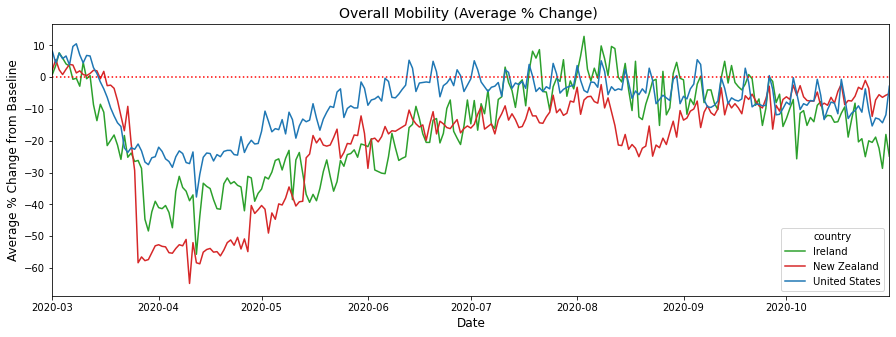

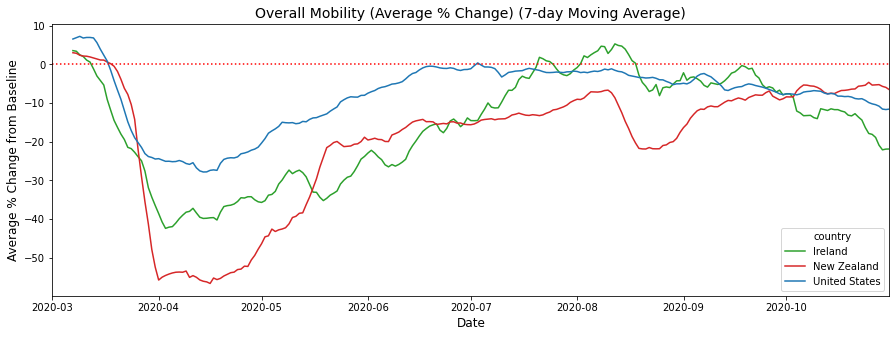

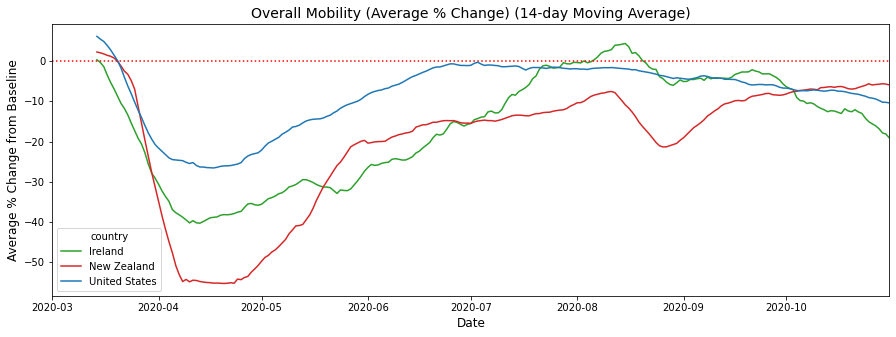

In [36]:
lineplot_rolling(df=overall['mobility'], countries=True)

- Just as before, we apply smoothing (7-day/14-day moving averages) to reduce the noise in the raw data. 
- The troughs for all three countries are clearly visible around April, when the pandemic first hit the three countries. 
- New Zealand had the steepest/quickest drop in mobility in April, as well as the deepest trough, compared to Ireland and United States. This shows that the people of New Zealand put great effort into reducing their mobility at the initial stages, which paid off later by controlling the spread of the virus to a great extent (almost non-existent at the moment).
- Ireland had the second deepest trough in April after New Zealand, and the United States had the least decrease in mobility (stayed closer to the baseline).
- Both New Zealand and Ireland experienced very few (10-20 approx.) new COVID-19 cases on average during the months of June and beginning of July. However, it is clear from the plot that Ireland's overall mobility had the steepest increase (went above the baseline in August) over the Irish summer months, but New Zealand (experiencing winter at the time) remained well below the baseline. This increased mobility in Ireland possibly led to the second spike in the number of COVID-19 cases in the country, starting in August, which was more pronounced compared to the initial wave. On the other hand, New Zealand, which did not increase its mobility as fast as Ireland, endured a much less intense second wave of the disease (which was not even close to New Zealand's initial spike in April).
- In the United States' case, the overall mobility did not decrease as much as Ireland or New Zealand in April, and went back up to the baseline (pre-COVID levels) in June, about an entire month earlier than Ireland.

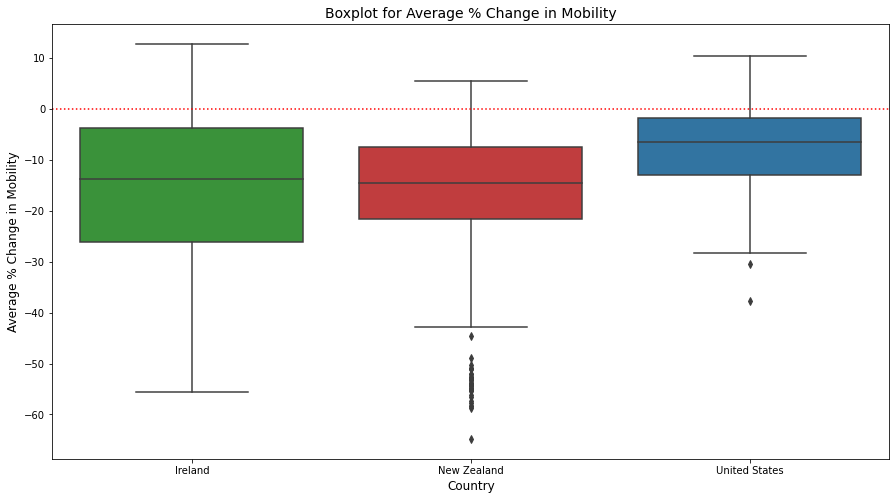

In [37]:
boxplot(df=overall['mobility'], average=True, palette=palette_2)

- Al three countries have their upper extreme above the baseline.
- Ireland has the greatest range in extremes for average % change in mobility.
- New Zealand has the most number of outliers, and the lowest upper extreme.
- United States has the highest (closest to baseline) median as well as the highest lower extreme, signifying that the country didn't reduce its mobility as much as the other two.
- Ireland has the maximum inter-quartile range, United States has the minimum.

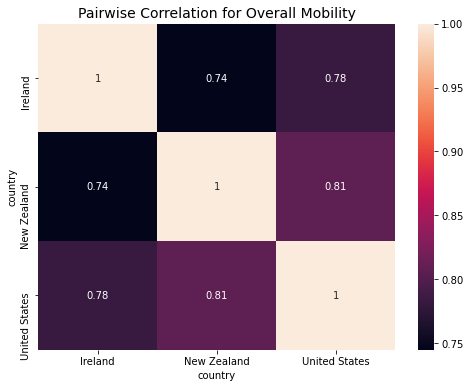

In [38]:
heatmap(df=overall['mobility'],
        title='Pairwise Correlation for Overall Mobility')

- New Zealand and United States have a strong positive correlation of 0.81, followed by Ireland and United States (0.78), then finally Ireland and New Zealand (0.74). 
- All three pairs of correlation are fairly strong, indicating that the pandemic hit the three countries around the same time, and the overall mobility trend over the year have been somewhat similar, although the countries' individual responses, and magnitude of % change were clearly different, hence also leading to different results with respect to the current severity of COVID-19 in the three countries.
- The trend lines are similar as all three country saw a sharp drop in overall mobility in April during the first wave of COVID-19, then gradually started approaching the base line over the next few months.

### (II) Location category-wise comparison for countries.

Apart from looking at the overall mobility for each country, perhaps it is also useful to compare the three countries by their mobility for each of the six categories individually. We will briefly analyse the comparison plots for each of the categories, and provide the observations obtained upon visual inspection. 

In [39]:
# create DataFrame comparing the three countries for a particular location category
def get_category_df(*dataframes: pd.DataFrame, category: str) -> pd.DataFrame:
    return pd.concat([df[category].rename(df['country'][0]) for df in dataframes], axis=1)


# dictionary of location categories, and corresponding DataFrames comparing the three countries
category_dfs = {c: get_category_df(
    ireland, nz, usa, category=c) for c in ireland.columns[1:]}


# lineplot for a single category DataFrame
def single_category_plot(category: str) -> None:
    lineplot_rolling(df=category_dfs[category], title=f"{category.replace('_', ' ').title()}: Mobility Report",
                     countries=True, average=False)

In [40]:
category_dfs['retail_and_recreation']

Ireland  New Zealand  United States
date                                           
2020-03-01      3.0          1.0           13.0
2020-03-02      4.0         -4.0            7.0
2020-03-03      8.0         -4.0           11.0
2020-03-04      5.0         -2.0            8.0
2020-03-05      4.0          0.0            8.0
...             ...          ...            ...
2020-10-27    -45.0         -6.0          -17.0
2020-10-28    -49.0         -2.0          -16.0
2020-10-29    -51.0         -2.0          -17.0
2020-10-30    -48.0          2.0          -14.0
2020-10-31    -58.0          7.0          -16.0

[245 rows x 3 columns]

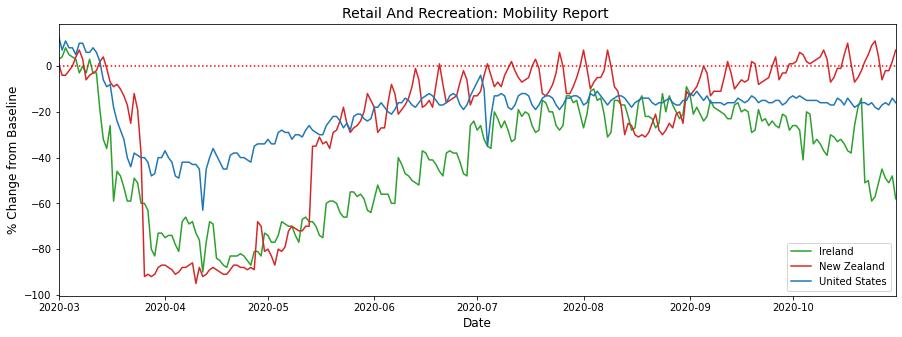

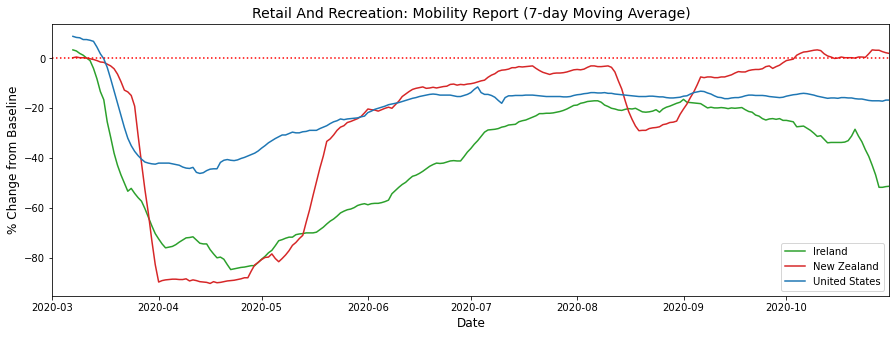

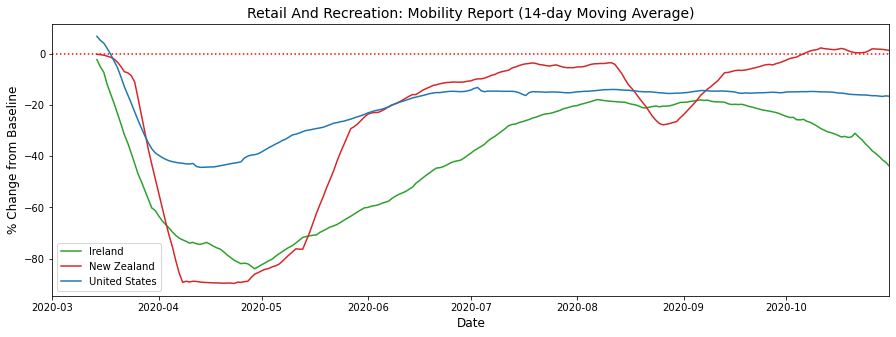

In [41]:
single_category_plot('retail_and_recreation')

- New Zealand has two clear troughs in April and August, and has reached pre-COVID levels of mobility around mid-September, with the virus largely suppressed in the country.
- United States reduced mobility only about half as much as New Zealand, and more or less remained stable at -20% from July.
- Ireland reduced mobility almost as much as New Zealand, and started increasing again until October, before decreasing once more from that point.

In [42]:
category_dfs['grocery_and_pharmacy']

Ireland  New Zealand  United States
date                                           
2020-03-01      3.0          4.0            9.0
2020-03-02      4.0         -1.0            6.0
2020-03-03      5.0          0.0           10.0
2020-03-04      4.0          0.0            6.0
2020-03-05      4.0          1.0            7.0
...             ...          ...            ...
2020-10-27      0.0         -3.0           -7.0
2020-10-28     -5.0         -4.0           -7.0
2020-10-29     -6.0         -4.0           -7.0
2020-10-30      1.0         -3.0           -4.0
2020-10-31     -2.0          0.0            2.0

[245 rows x 3 columns]

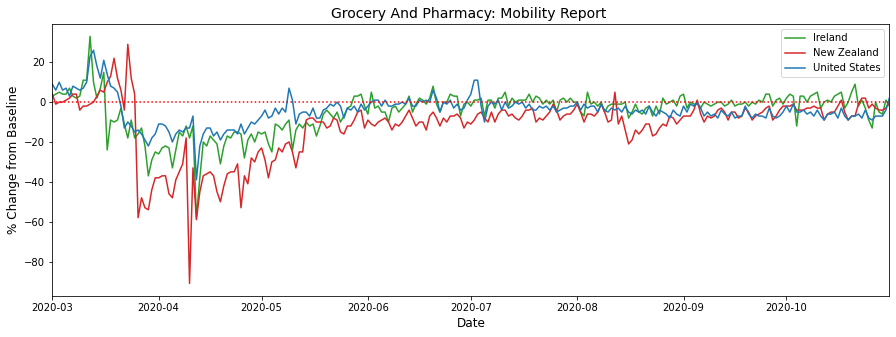

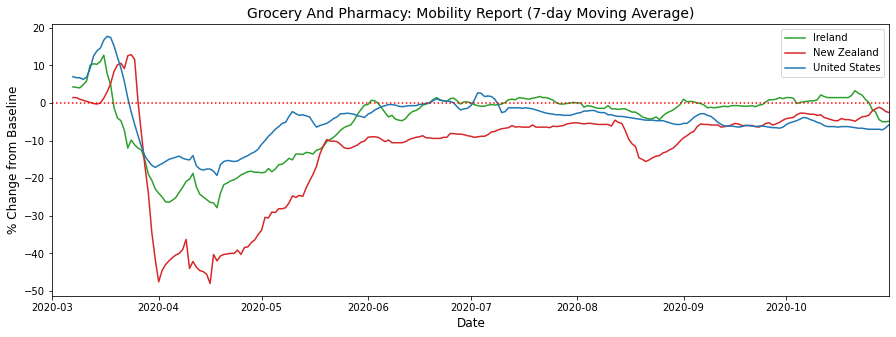

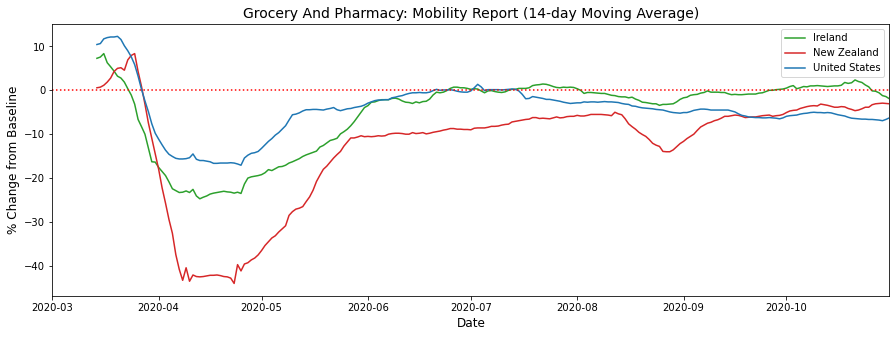

In [43]:
single_category_plot('grocery_and_pharmacy')

- In case of `grocery_and_pharmacy`, Ireland and United States have very similar trend lines with a minor April trough, then staying close to the baseline from June onward.
- Even though New Zealand has troughs around the same time as the other two countries, the magnitude of decrease is much greater compared to that for United States and Ireland.

In [44]:
category_dfs['parks']

Ireland  New Zealand  United States
date                                           
2020-03-01     -5.0         -1.0           18.0
2020-03-02     12.0        -10.0           10.0
2020-03-03     29.0         -6.0           20.0
2020-03-04     25.0        -17.0           17.0
2020-03-05     15.0        -15.0           21.0
...             ...          ...            ...
2020-10-27     20.0         -9.0            1.0
2020-10-28      8.0         -7.0           -2.0
2020-10-29    -25.0        -16.0           -6.0
2020-10-30     24.0        -16.0            1.0
2020-10-31    -17.0        -16.0           27.0

[245 rows x 3 columns]

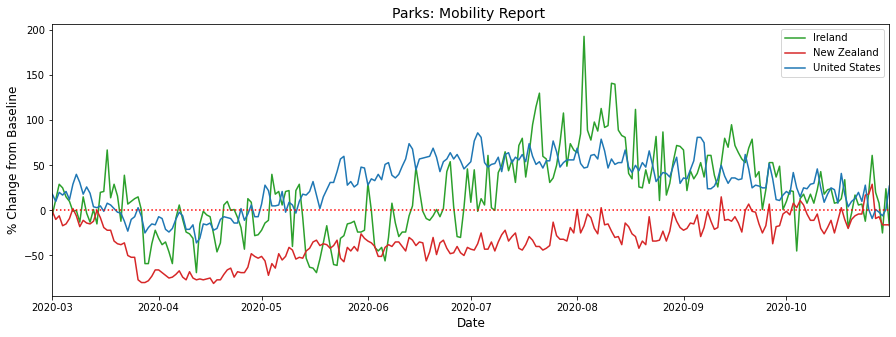

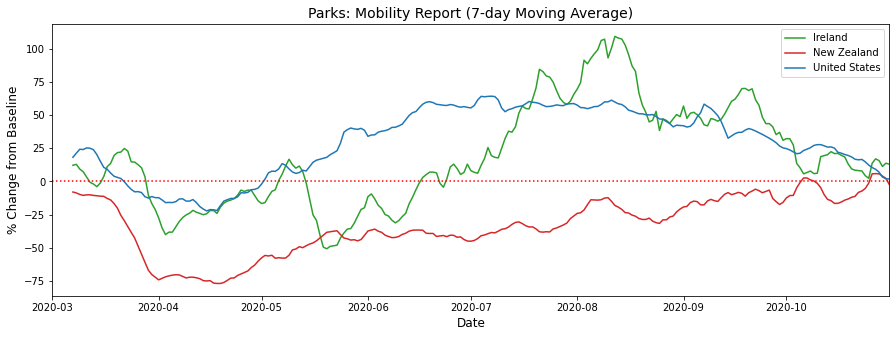

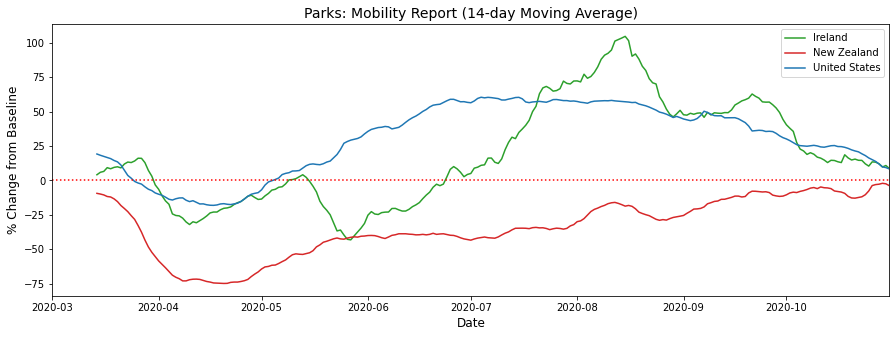

In [45]:
single_category_plot('parks')

- `parks` is one of the categories where the three countries differ quite a bit.
- New Zealand has the deepest trough in April, and only gradually rises towards the baseline from May to end of October.
- Ireland and United States on the other hand, experienced significant increase above the baseline (Ireland about a month later than the US). Both of these countries' mobility started declining towards the baseline around August (the United States doing so more gradually than Ireland).

In [46]:
category_dfs['transit_stations']

Ireland  New Zealand  United States
date                                           
2020-03-01      2.0          8.0            7.0
2020-03-02      1.0         16.0            2.0
2020-03-03      2.0          8.0            3.0
2020-03-04      1.0          9.0            2.0
2020-03-05      0.0         10.0            2.0
...             ...          ...            ...
2020-10-27    -56.0        -28.0          -33.0
2020-10-28    -58.0        -26.0          -34.0
2020-10-29    -61.0        -26.0          -35.0
2020-10-30    -56.0        -26.0          -32.0
2020-10-31    -58.0        -26.0          -23.0

[245 rows x 3 columns]

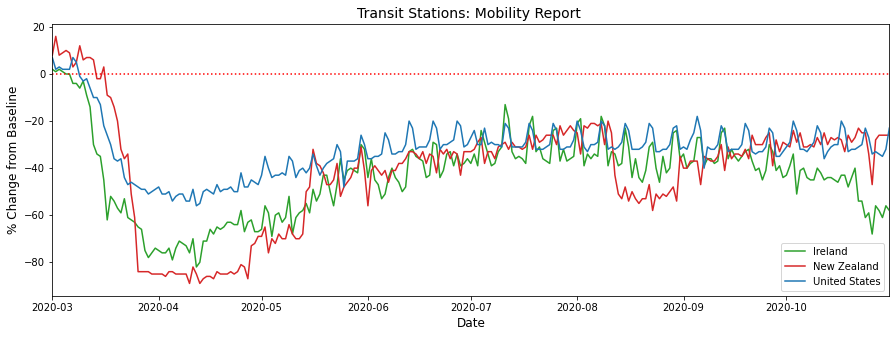

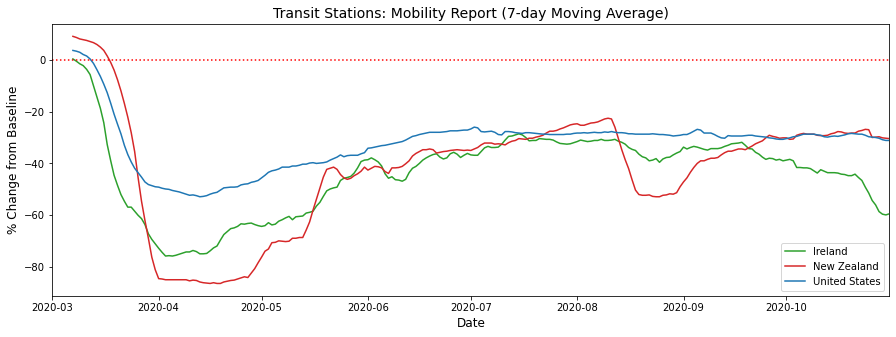

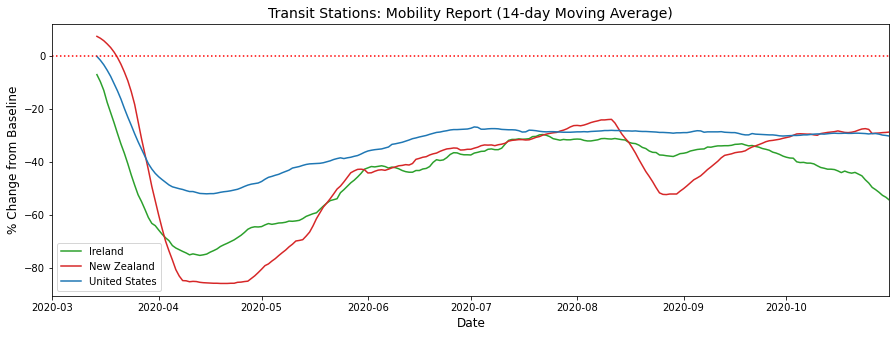

In [47]:
single_category_plot('transit_stations')

- `transit_stations` trend line is again, very similar for all three countries, but as earlier, the % decrease in April for New Zealand is almost double that of the United States. 
- None of the countries have gotten higher than -30% (approx.) from the baseline for this category, with most people still avoiding public transport. 

In [48]:
category_dfs['workplaces']

Ireland  New Zealand  United States
date                                           
2020-03-01      2.0          1.0            3.0
2020-03-02      1.0         34.0            3.0
2020-03-03      3.0         17.0            2.0
2020-03-04      1.0         16.0            3.0
2020-03-05      2.0         20.0            3.0
...             ...          ...            ...
2020-10-27    -50.0          0.0          -31.0
2020-10-28    -49.0          4.0          -30.0
2020-10-29    -50.0          8.0          -31.0
2020-10-30    -48.0          7.0          -30.0
2020-10-31    -27.0          2.0          -10.0

[245 rows x 3 columns]

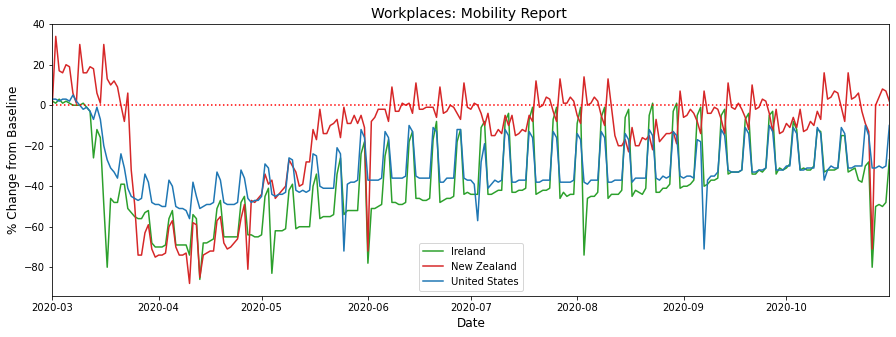

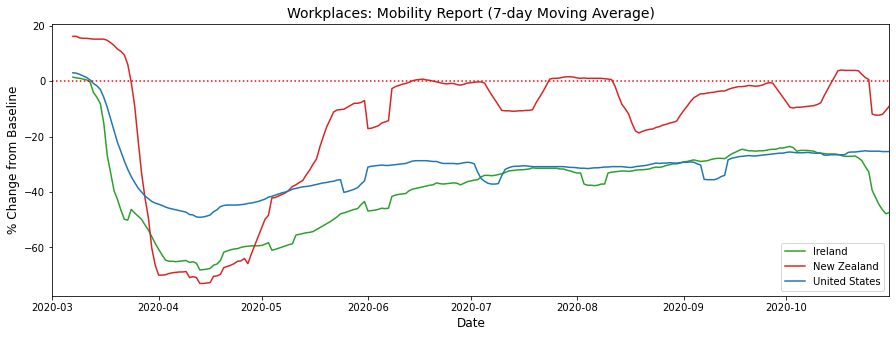

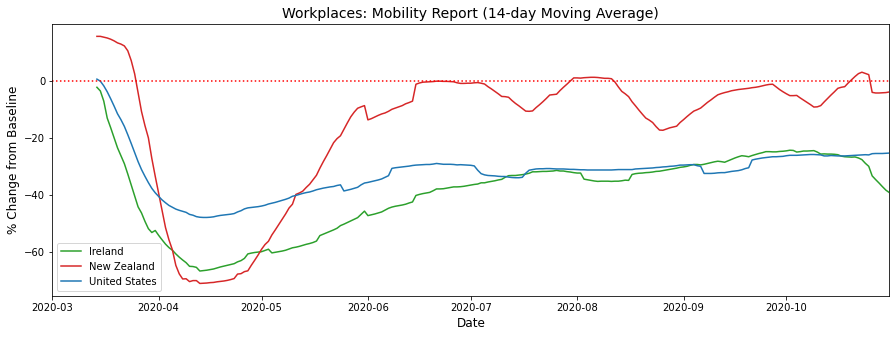

In [49]:
single_category_plot('workplaces')

- Ireland and United States have very similar trend lines for `workplaces`, and only reach the point of about -30% to -40% from baseline around July 2020.
- New Zealand on the other hand, returned close to the baseline as early as June when most people went back to work (as the number of new COVID-19 cases came under control in the country). 

In [50]:
category_dfs['residential']

Ireland  New Zealand  United States
date                                           
2020-03-01      0.0          1.0           -1.0
2020-03-02      0.0         -2.0           -1.0
2020-03-03     -1.0         -1.0           -1.0
2020-03-04      0.0         -1.0           -1.0
2020-03-05      0.0         -1.0           -1.0
...             ...          ...            ...
2020-10-27     18.0          3.0           10.0
2020-10-28     19.0          2.0           10.0
2020-10-29     21.0          2.0           10.0
2020-10-30     19.0          2.0            8.0
2020-10-31     13.0          2.0            3.0

[245 rows x 3 columns]

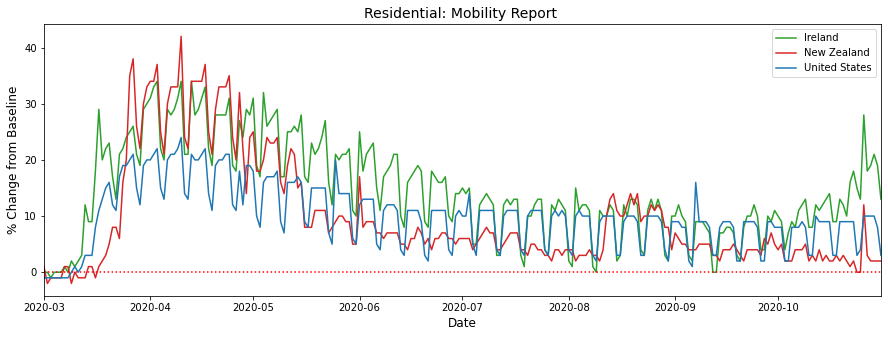

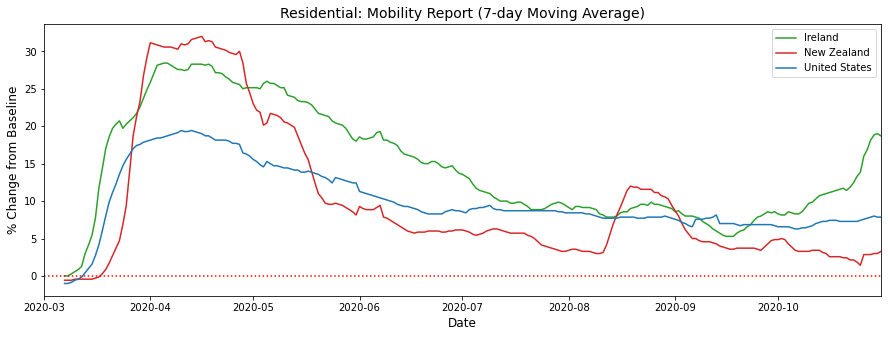

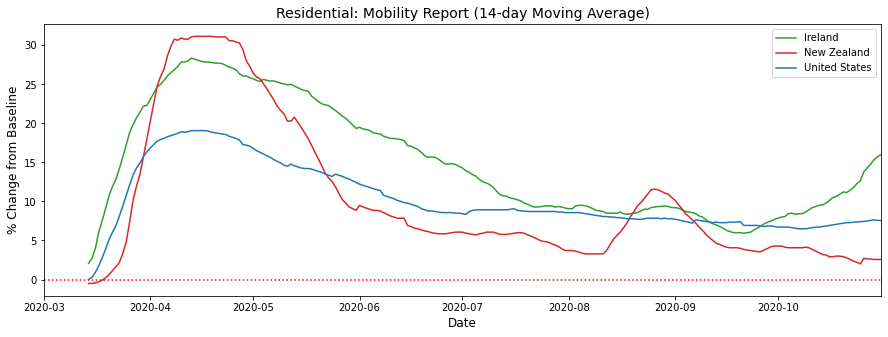

In [51]:
single_category_plot('residential')

- `residential` mobility increases for all three countries, with people staying at home during the pandemic, but it is quite possibly the case that the greater % increase for New Zealand (especially almost double that of United States) in the early stages  played an important role in reducing the spread of COVID-19 in the country.
- In August, a second spike in `residential` mobility is visible, which shows the commitment that New Zealanders have shown, even with only a small number of COVID-19 cases in the country at the time of the second wave of the disease.

---
All things considered, the mobility data from Google indeed reveals some fascinating trends regarding the effects of the COVID-19 pandemic around the world, and the various aspects in which countries are similar or different. I'm certain that further analysis with a greater number of countries will be extremely useful in understanding the nature of the virus that disrupted our world in 2020!